<a href="https://colab.research.google.com/github/muscak/MIT-PE-Applied-Data-Science-Program/blob/master/FoodHub%20Data%20Analysis/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description<a id="data_desc"></a>

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
# Display only 3 digits after floating point in pandas objects
pd.set_option('display.float_format', lambda x:'%.3f' % x)

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
plt.rcParams['axes.spines.top'] = False # Remobe top border
plt.rcParams['axes.spines.right'] = False # Remobe rigth border

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# set the path of the data
path = '/content/drive/MyDrive/Colab Notebooks/Applied Data Science/Foundations for Data Science/Project Assessment: Foundations for Data Science/'
# read the data
df = pd.read_csv(path + 'Data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
nr_rows = df.shape[0]
nr_cols = df.shape[1]
print('There are', nr_rows, 'rows and', nr_cols, 'columns in the dataset.')

There are 1898 rows and 9 columns in the dataset.


#### Observations:
The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The provided dataset has:
- 5 numeric columns
- 4 categorical (object) columns

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

It looks like there are no missing values in the dataset. However, we can see that there are some values which are set as 'Not given' in the `rating` column. Which can be considered as `NULL`.

Let's check if there are similar cases for the other object type columns.

In [ ]:
# Checking if there are any different data types in restaurant_name column
df['restaurant_name'].apply(type).value_counts()

<class 'str'>    1898
Name: restaurant_name, dtype: int64

In [ ]:
# Checking if there are any different data types in cuisine_type column
df['cuisine_type'].apply(type).value_counts()

<class 'str'>    1898
Name: cuisine_type, dtype: int64

In [ ]:
# Checking if there are any different data types in day_of_the_week column
df['day_of_the_week'].apply(type).value_counts()

<class 'str'>    1898
Name: day_of_the_week, dtype: int64

In [ ]:
# Checking if there are any different data types in rating column
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts(normalize=True)

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64

In [ ]:
# Replace 'Not given' with NaN in the 'rating' column
df['rating'].replace('Not given', np.nan, inplace=True)

In [ ]:
# Convert the rating column into float to calculate mean and etc
df['rating'] = df['rating'].astype(float)

In [ ]:
# Percentages of restaurant that are not rated at least once
df[df['rating'].isnull()]['restaurant_name'].nunique()/df['restaurant_name'].nunique()

0.7528089887640449

In [ ]:
df.groupby('restaurant_name')['rating'].count()

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [ ]:
# Group the DataFrame by 'restaurant_name' and count the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Filter for restaurants with only one order
filtered_df = df[df['restaurant_name'].isin(restaurant_order_counts[restaurant_order_counts == 1].index)]
print('There are', filtered_df.shape[0], 'restaurants with only 1 order')

There are 50 restaurants with only 1 order


In [ ]:
print(filtered_df[filtered_df['rating'].isnull()].shape[0], 'out of 50 has no rating')

16 out of 50 has no rating


In [ ]:
df.groupby('restaurant_name')['rating'].mean()

restaurant_name
'wichcraft         5.000
12 Chairs          4.500
5 Napkin Burger    4.000
67 Burger          5.000
Alidoro              NaN
                    ... 
Zero Otto Nove     4.000
brgr               3.000
da Umberto         5.000
ilili Restaurant   4.154
indikitch          4.500
Name: rating, Length: 178, dtype: float64

In [ ]:
df.groupby('cuisine_type')['rating'].mean()

cuisine_type
American         4.299
Chinese          4.338
French           4.300
Indian           4.540
Italian          4.360
Japanese         4.374
Korean           4.111
Mediterranean    4.219
Mexican          4.417
Middle Eastern   4.235
Southern         4.308
Spanish          4.833
Thai             4.667
Vietnamese       4.000
Name: rating, dtype: float64

#### Observations:
- Almost 40% of the orders are not rated.
- Almost 75% of the restaurants have at least one missing rating.
- There are 50 restaurants with only 1 order and 16 out of this 50 has no rating. It's hard to impute this value. May be we can use the mean based on the `cuisine_type` for these restaurants.
- However, it's better to leave the imputing strategy after performing multivariate analysis as the rating might have a dependency on cooking and delivery time.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# List of the numeri columns
# This list does not contain the order_id and the customer_id columns
# Above mentioned 2 columns are unique identifiers
nr_column_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
df[nr_column_list].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
Once an order is placed the minimum, average, and maximum time it takes for food to be prepared are 20, 27.3 and 35 minutes respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Filter the dataset based on the rating column
no_rating = df[df['rating'].isnull()].shape[0]
no_rating

736

In [ ]:
perc_no_rating = no_rating / nr_rows
perc_no_rating

0.38777660695468913

#### Observations:
There are 736 data points that don't have rating information. This is almost 39% of the total data points.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
# A function to display the both the histogram and the boxplot of a numeric column
def dist_plot(df, feature):
  '''
    This function takes the name of the feature and
    plots the distribution of the numeric values
    both using boxplot and hisplot of seaborn.
    The purpose is to check if the numeric feature has
    normal distribution and detect outliers manualy.
    Skewness and kurtosis values of the data are also
    shown.

    Parameters
    ----------
    df: tabular data in data frame format.
    feature: string
      numeric feature (column) in the data frame.
    '''

  # Create figure and related axises
  fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,
                                        gridspec_kw={'height_ratios':(0.15, 0.85)})

  # Draw the box plot for the given feature
  sb.boxplot(data=df, x=feature, showmeans=True, ax=ax_box)
  ax_box.set_xlabel('')

  # Draw the histogram with kde plot for the given feature
  sb.histplot(data=df, x=feature, ax=ax_hist, kde=True)
  ax_hist.set_xlabel('')

  # Calculate mean and the median values of the feature
  mean_value = df[feature].mean()
  median_value = df[feature].median()
  # Add these values as a vertical line to the plot
  ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2,
                  label='Mean')
  ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2,
                  label='Median')
  # Add a legend
  ax_hist.legend(loc='lower right')

  plt.title(feature)
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_counts(df, feature):
  '''
    This function takes the name of the feature and
    plots the distribution of the categorical values
    and saves the figure for future usage.
    using countplot function of seaborn.


    Parameters
    ----------
    df: tabular data in data frame format.
    feature: string
      numeric feature (column) in the data frame.

    '''

  # List of the unique values in the column
  values = df[feature].value_counts().index
  # List of the counts for eac unique value in the column
  counts = df[feature].value_counts().values

  # Create the figure obejct and set the size in width x height format
  fig, ax = plt.subplots(figsize=(12,8))
  # Define a color palette
  color_palette = sb.color_palette('crest')
  bar_container = ax.bar(values, counts, color=color_palette)
  ax.set(ylabel='Count', title=feature)
  ax.bar_label(bar_container, fmt='{:,.0f}')
  ax.tick_params(axis='x', rotation=90)

  plt.show()

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

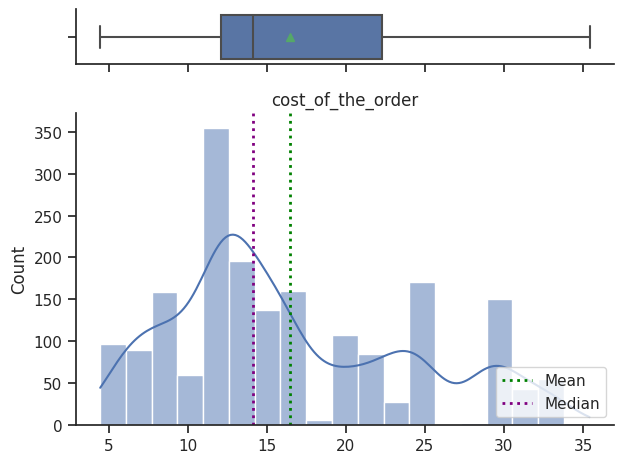

In [ ]:
# Plot the cost_of_the_order
dist_plot(df, 'cost_of_the_order')

#### Observations on `cost_of_the_order`:
- Column has a multi-modal distribution
- It's right skewed
- It doesn't have any outliers

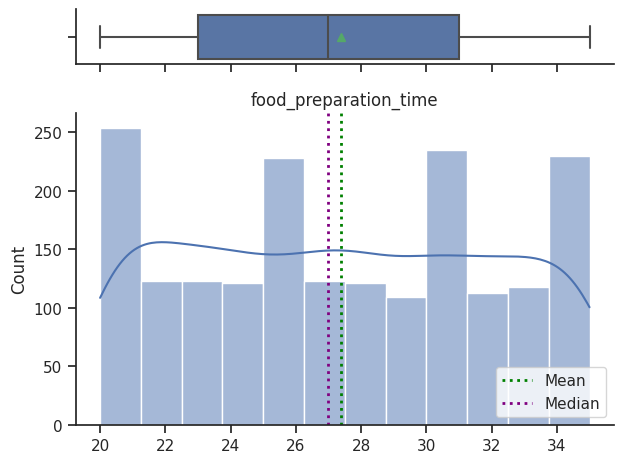

In [ ]:
# Plot the food_preparation_time
dist_plot(df, 'food_preparation_time')

#### Observations on `food_preparation_time`
- The data has a multi-modal distribution
- mean and the median values are very close to each other.
- There are no outliers in the data

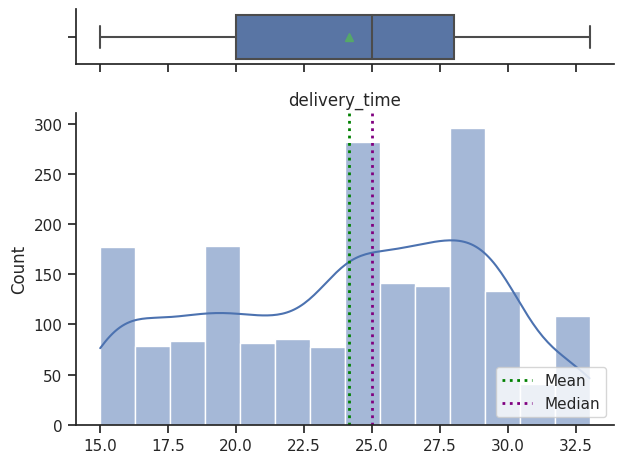

In [ ]:
# Plot the delivery_time
dist_plot(df, 'delivery_time')

#### Observations on `delivery_time`
- Just like to the other 2 numeric features this one also has a mutli-modal distribution
- There are no outliers for this column as well
- The data looks left skewed

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


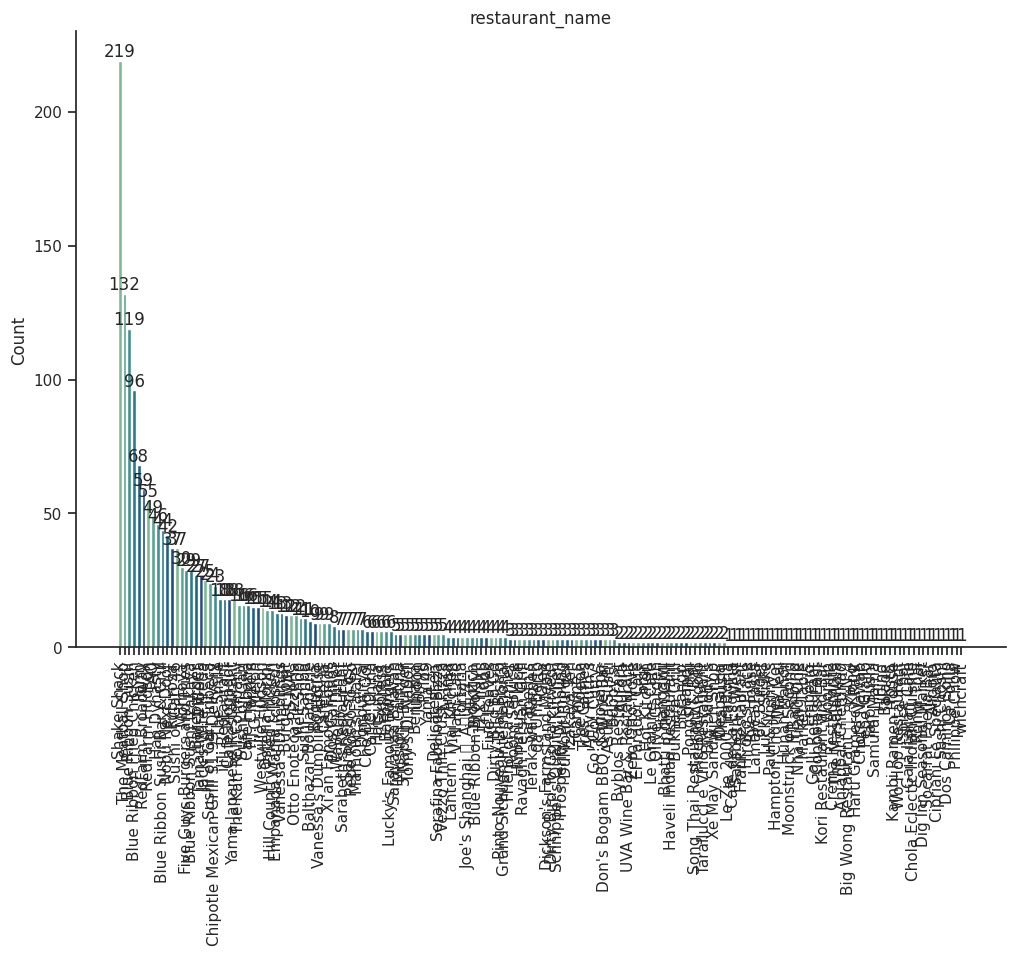

In [ ]:
# Plot the counts of restaurant_name
plot_counts(df, 'restaurant_name')

In [ ]:
# Display the number of unique restaurants
df['restaurant_name'].nunique()

178

In [ ]:
# We must increase the number of rows can be displayed in a single Jupyter cell
# The default value is 10 an it only shows 10 rows at a time
# We'll set it to 500 which is arbitrarily chosen
pd.set_option('display.max_rows', 500)
df['restaurant_name'].value_counts()

Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Rubirosa                                  37
Sushi of Gari 46                          37
Momoya                                    30
Five Guys Burgers and Fries               29
Blue Ribbon Sushi Izakaya                 29
Bareburger                                27
Tamarind TriBeCa                          27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
The Smile                                 18
ilili Rest

#### Observations on `restaurant_name`
- There are 178 restaurants which make very hard for us to get valuable insights just by looking at the bar graph.
- "Shake Shack" is the restaurant with the highest number of roders follewed by "The Meatball Shop".
- Some restaurants had only a few orders.

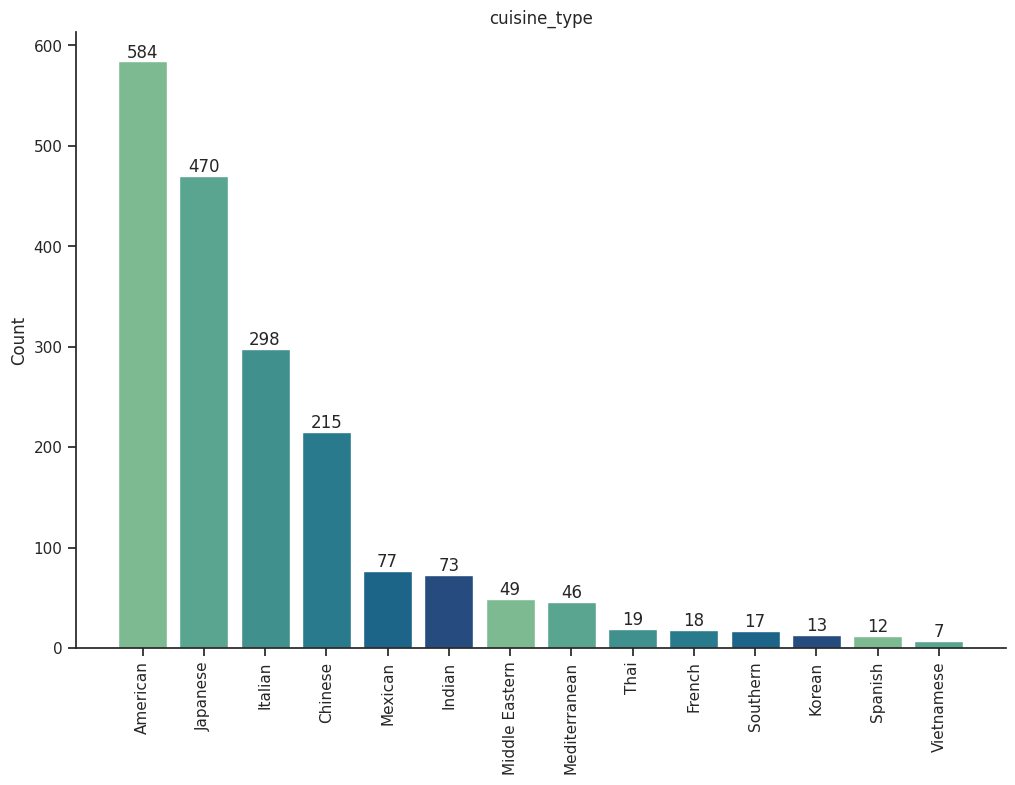

In [ ]:
# Plot the counts of cuisine_type
plot_counts(df, 'cuisine_type')

In [ ]:
df['cuisine_type'].nunique()

14

#### Observations on `cuisine_type`
- There are 14 different cuisine types in the dataset.
- The most ordered foods are from the American cuisine followed by the Japanese.
- Vietnamese cuisine has the least number of orders in the dataset.

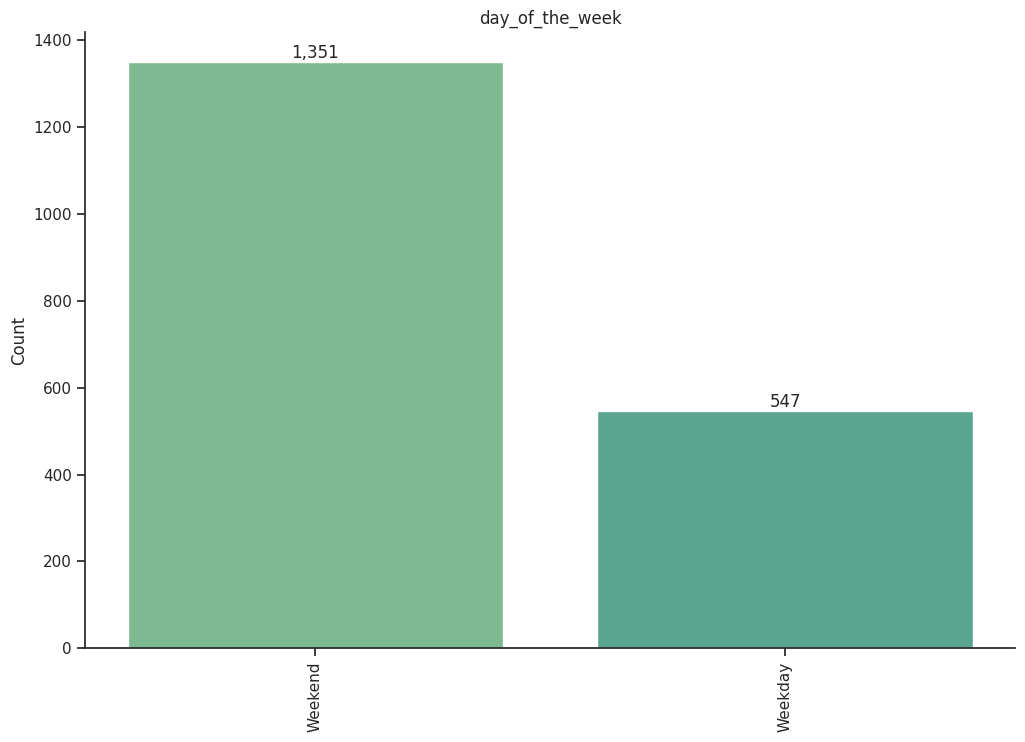

In [ ]:
# Plot the counts of day_of_the_week
plot_counts(df, 'day_of_the_week')

In [ ]:
df['day_of_the_week'].value_counts(normalize=True)

Weekend   0.712
Weekday   0.288
Name: day_of_the_week, dtype: float64

#### Observations on `day_of _the_week` <a id="dayofweek"></a>
- People are tend to order food during weekends. Almost 72% of all orders were given in weekends.

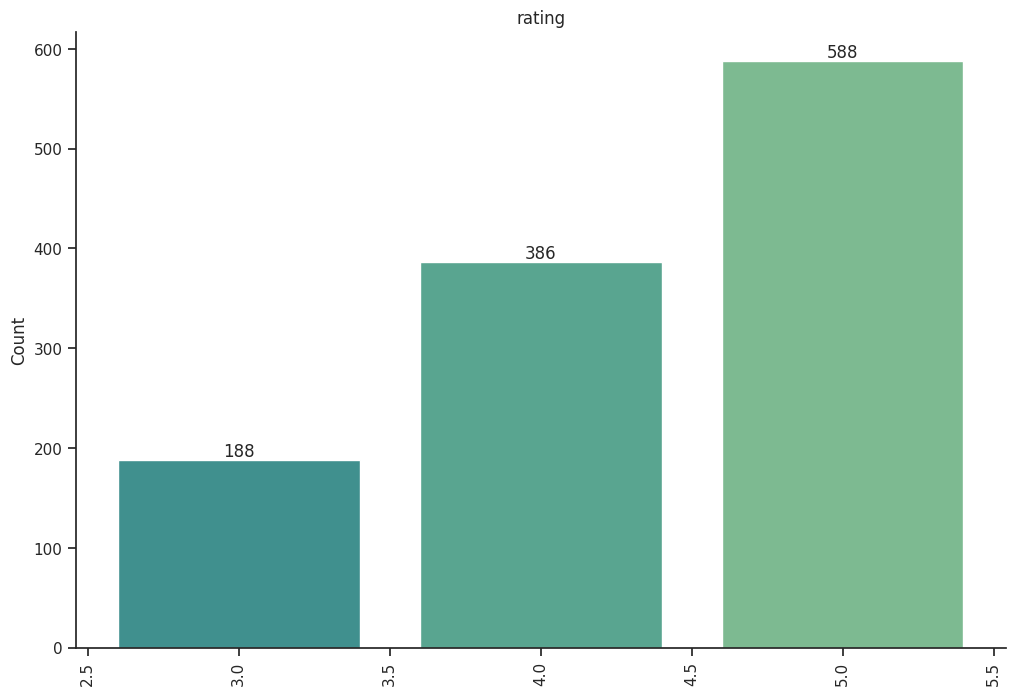

In [ ]:
# Plot the counts of rating
plot_counts(df, 'rating')

#### Observations on `rating`
- Majority of the orders are rated as 5

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Display the value counts for each restaurant, sort the data series by the
# values in an descending order and get only top 5
top5_rest = df['restaurant_name'].value_counts().sort_values(ascending=False)[:5]
top5_rest

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
# Display the percentage of these top 5 restauranst in the entire dataset
df['restaurant_name'].value_counts(normalize=True).sort_values(ascending=False)[:5]

Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
Name: restaurant_name, dtype: float64

In [ ]:
# Display the cuisine types of these top 5 restaurants
filtered_df = df[df['restaurant_name'].isin(top5_rest.index)][['restaurant_name', 'cuisine_type']]
filtered_df.drop_duplicates()

,restaurant_name,cuisine_type
3,Blue Ribbon Fried Chicken,American
6,The Meatball Shop,Italian
15,Shake Shack,American
19,Blue Ribbon Sushi,Japanese
34,Parm,Italian
123,The Meatball Shop,American


As can be seen from the above table 'The Meatball Shop' has both American type and Italian type restaurant. Let's check if it's an anomaly or not.

In [ ]:
# Check how many of The Meatball Shop orders are marked as American or Italian
df[df['restaurant_name'] == 'The Meatball Shop']['cuisine_type'].value_counts()

Italian     112
American     20
Name: cuisine_type, dtype: int64

#### Observations:
- "Shake Shack" has the highest number of orders with 219. This is almost 11% of the total orders.
- "The Meatball Shop" has 132 orders and it's the numer 2 in the list. It's share in the dataset is 7%.
- 3 out of top 5 restaurants serve American cuisine, 1 is Japanese and remaining is Italian.
- ❗️it's hard to differentiate if 'The Meatball Shop' retaurant is an American or Italian restaurant.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the dataset by day_of_the_week is equal to Weekend
# get the value counts for cuisine type from the filtered dataframe
# sort it in descending order
# get the top (highest value) for that cuisine
top_weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().sort_values(ascending=False)[:1]
top_weekend_cuisine

American    415
Name: cuisine_type, dtype: int64

In [ ]:
# get the total number or orders in weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend'].shape[0]
# percentage of that particular cuisine
top_weekend_cuisine/weekend_orders

American   0.307
Name: cuisine_type, dtype: float64

#### Observations:

American cuisine is the most preferred one among others in weekends. It has almost 30% share among all weekend orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Get the number of orders cost more than 20 dollars.
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
# Calculate percentage of it
orders_above_20 / nr_rows

0.2924130663856691

#### Observations:
Almost 30% percent of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean value of order delivery time
mean_delievery = df['delivery_time'].mean()
mean_delievery

24.161749209694417

#### Observations:
Mean order delivery time 24.1 minutes. Which means that 24 minutes and 6 seconds.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Print the customer_id and the number orders in data series format
df['customer_id'].value_counts().sort_values(ascending=False)[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

- The customer with 52832 customer id has ordered 13 times so far.
- The customer with 47440 customer id has ordered 10 times so far.
- The customer with 83287 customer id has ordered 9 times so far.



### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


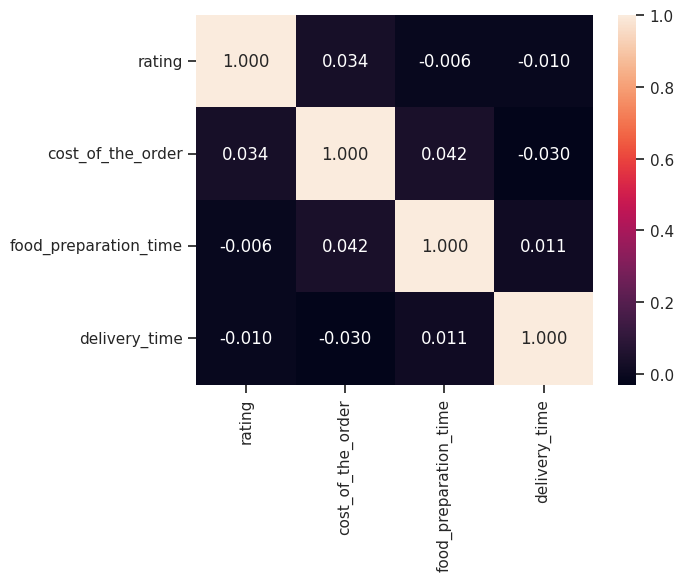

In [ ]:
columns=['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
sb.heatmap(df[columns].corr(), annot=True, fmt='.3f')
plt.show()

#### Observations using Heatmap:

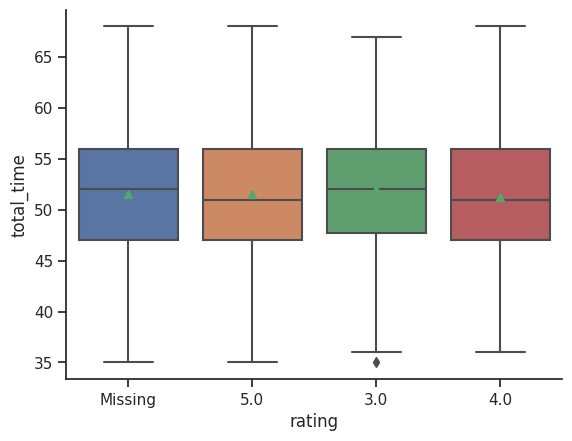

In [ ]:
# Calculate the total time to deliver a food for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()
# Fill missing values in the 'rating' column with a specific value ('Missing')
# It will allow us to display the missing ratings on the plot
df_copy['rating'].fillna('Missing', inplace=True)
sb.boxplot(data=df_copy, x='rating', y='total_time', showmeans=True)
plt.show()

#### Observations on the relation of `total_time` and `rating`:

It seems that there is not direct correlation between the rating of the order and the total time spent to prepare and deliver it.

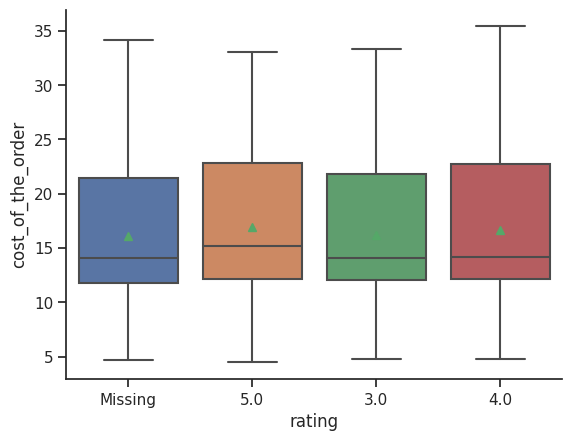

In [ ]:
sb.boxplot(data=df_copy, x='rating', y='cost_of_the_order', showmeans=True)
plt.show()

#### Observations on the relation of `cost_of_the_order` and `rating`:

It seems that there is not direct correlation between the rating of the order and the cost of the order. However, we can see that the median value of the orders rated as 5 is slightly higher than the rest.

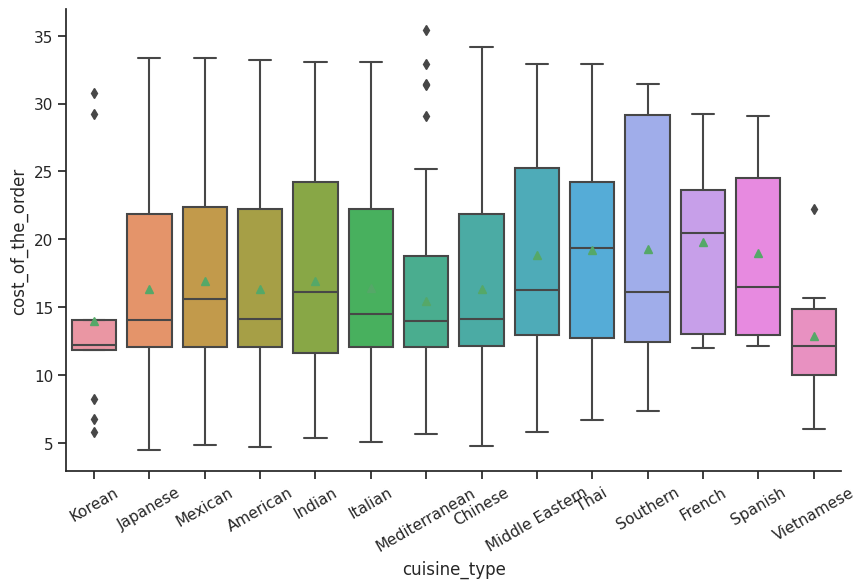

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', showmeans=True)
plt.xticks(rotation=30)
plt.show()

#### Observations on the relation of `cost_of_the_order` and `cuisine_type`:
- "Vietnamese" cuisine has the least median value for `cost_of_the_order` among the others.
- "Korean" follows the "Vietnamese" with a few outliers.
- The distribution of the `cost_of_the_order` is left skewed for almost all of the `cuisine_type` except "French" cuisine. Which **might** be an indicator that the French cuisine is more expenxive than the others.    

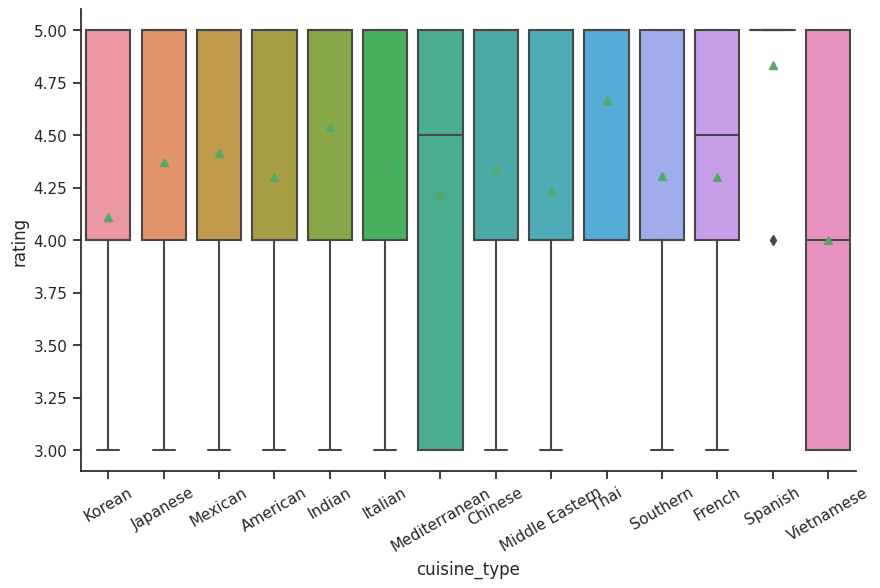

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df, x='cuisine_type', y='rating', showmeans=True)
plt.xticks(rotation=30)
plt.show()

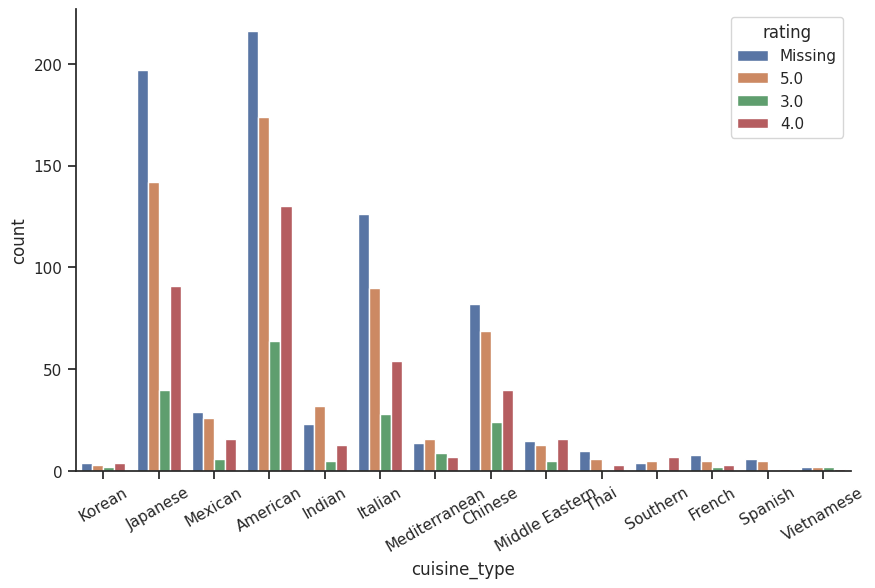

In [ ]:
plt.figure(figsize=(10,6))
sb.countplot(data=df_copy, x='cuisine_type', hue='rating')
plt.xticks(rotation=30)
plt.show()

#### Observations on the relation of `rating` and `cuisine_type`:
- The highest mean rating is belong to "Spanish" cuisine. However, since that cuisine type only have 12 orders, it's hard to say that it has the highest average rating.
- Japanese cousine is the second in ranking of 5 points ratings.

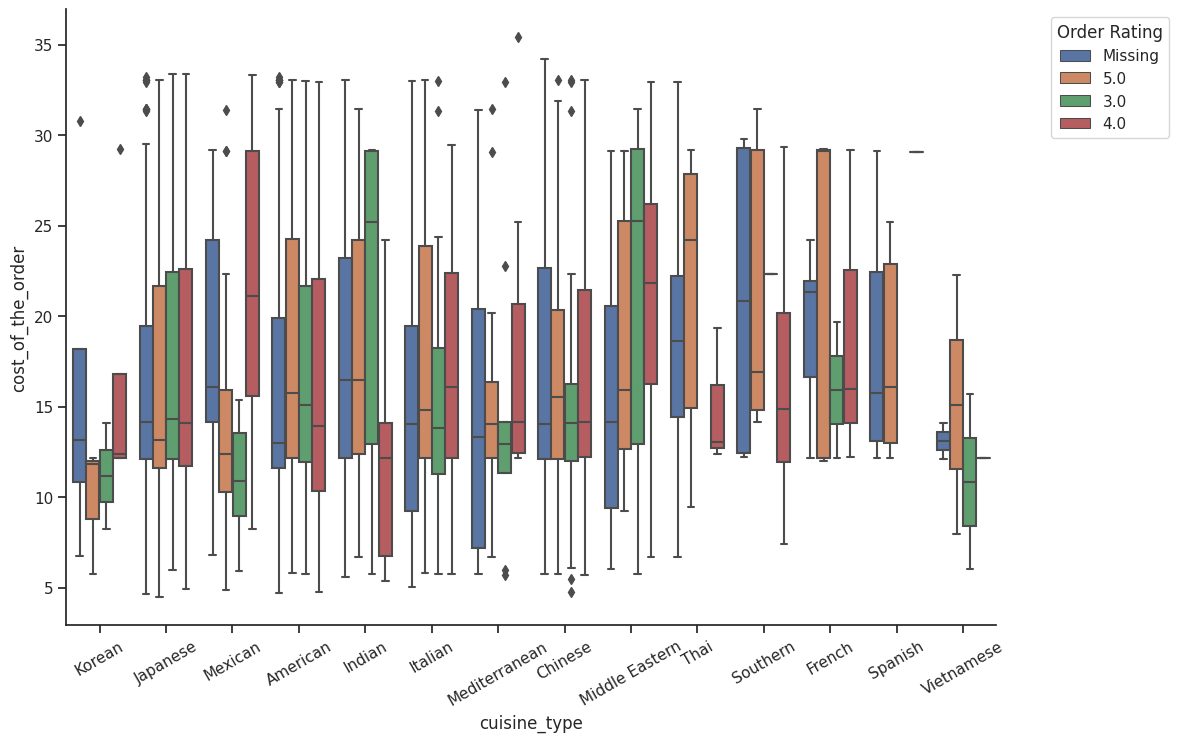

In [ ]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df_copy, x='cuisine_type', y='cost_of_the_order', hue='rating')
# Put the legend out of the plotting area as it has many information
plt.legend(title="Order Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.show()

#### Observations on the relation of `cost_of_the_order` and `rating` grouping by `cuisine_type`:
- People are tend to either rate as 5 or give no rating for the Spanish cuisine orders.
- The highest value for `cost_of_the_order` is from "Mediterranean" cuisine and it has 4 `rating` value.
- It's hard to notice a direct correlation among these 3 features.

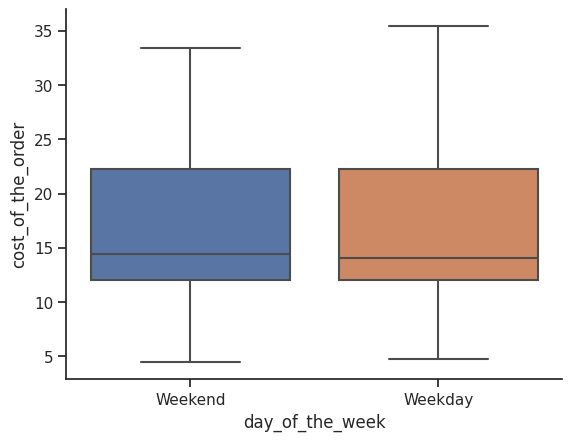

In [ ]:
sb.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.show()

#### Observations on the relation of `cost_of_the_order` and `day_of_the_week`:
- The range of the distribution of `cost_of_the_order` is wider for the orders that are placed during weekdays when it's compared to the weekend orders eventhough the number of orders during weekends are higher than weekday orders [pls](#dayofweek).
- On the other hand, the median value of weekday orders are slightly less than the the median value of weekend orders.

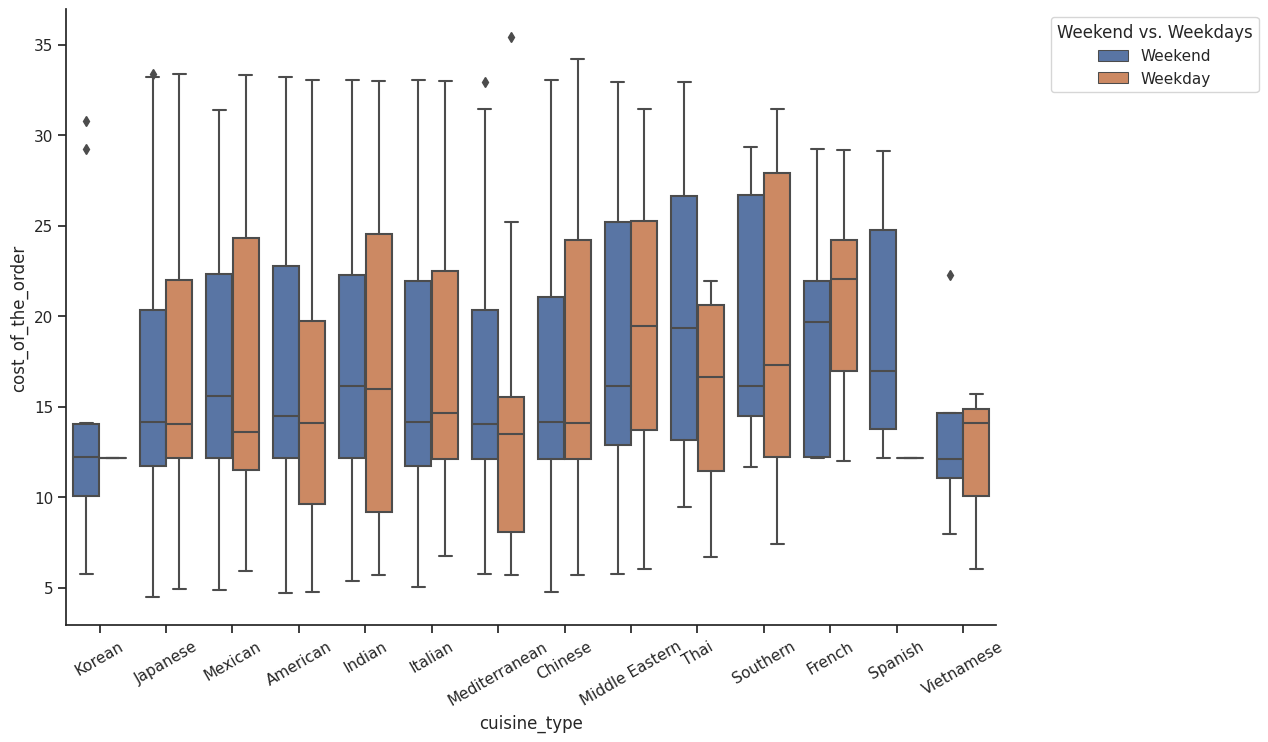

In [ ]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week')
# Put the legend out of the plotting area as it has many information
plt.legend(title="Weekend vs. Weekdays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.show()

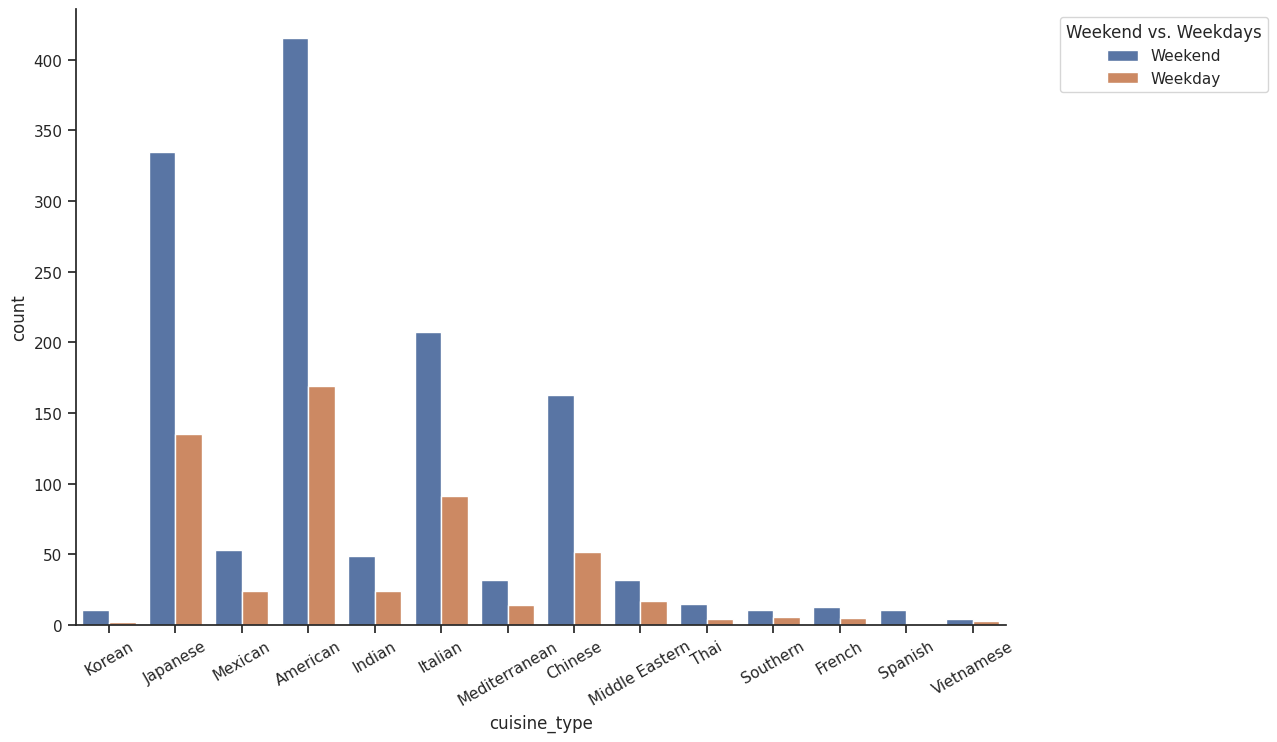

In [ ]:
plt.figure(figsize=(12,8))
sb.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
# Put the legend out of the plotting area as it has many information
plt.legend(title="Weekend vs. Weekdays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.show()

#### Observations on the relation of `cost_of_the_order` and `cuisine_type` grouped by `day_of_the_week`:
- Peope prefer "Spanish" cuisine in weekends and the same for the "Korean" cuisine.
- The most paid cuisine was from "Mediterian" and it was place in weekend.
- "American" cuisine is more preferred in weekends.

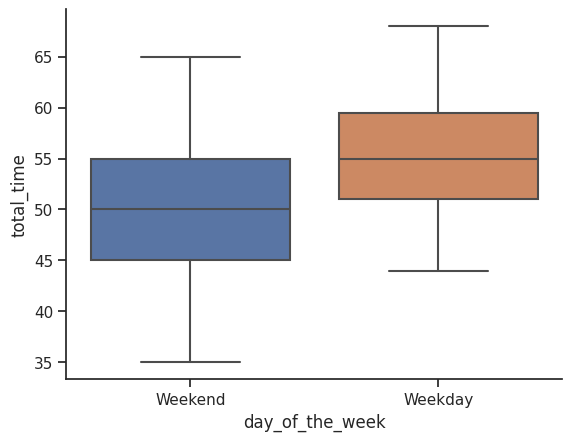

In [ ]:
sb.boxplot(data=df, x='day_of_the_week', y='total_time')
plt.show()

#### Observations on the relation of `day_of_the_week` and `total_time`:
- Min total time spent to deliver an order takes 45 minutes during weekdays which is 10 minutes higher than weekends.
- Median value of weekdays is also higher than weekends.
- Even though the number of orders is much higher than weekdays, and order can be delivered quicker than weekdays.
- Restaurants are

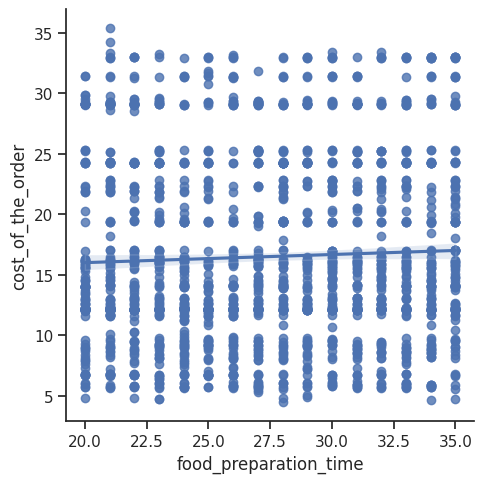

In [ ]:
sb.lmplot(data=df, x='food_preparation_time', y='cost_of_the_order')
plt.show()

#### Observations on the relation of `food_preparation_time` and `cost_of_the_order`:

There is no direct correlation between the `food_preparation_time` and the `cost_of_the_order`. We **can't** say the more costs the order the more time it takes to prepare.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Create a dataframe which has no null values in the rating column
df_non_null_rating = df.dropna(subset=['rating'])
# Create a data series which has more than 50 orders with rating
ds_above_50_rating = df_non_null_rating['restaurant_name'].value_counts()[df_non_null_rating['restaurant_name'].value_counts() > 50]


In [ ]:
# List these restaurants and the rating counts
ds_above_50_rating

Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: restaurant_name, dtype: int64

In [ ]:
# Create a data series which has the restaurant name and the mean rating
ds_rating_means = df[df['restaurant_name'].isin(ds_above_50_rating.index)].groupby('restaurant_name')['rating'].mean()
# List on the restaurants has more than 4 point mean sorted by mean rating
ds_above_4 = ds_rating_means[ds_rating_means > 4].sort_values(ascending=False)
ds_above_4 = ds_above_4.to_frame()
ds_above_4

,rating
restaurant_name,
The Meatball Shop,4.512
Blue Ribbon Fried Chicken,4.328
Shake Shack,4.278
Blue Ribbon Sushi,4.219


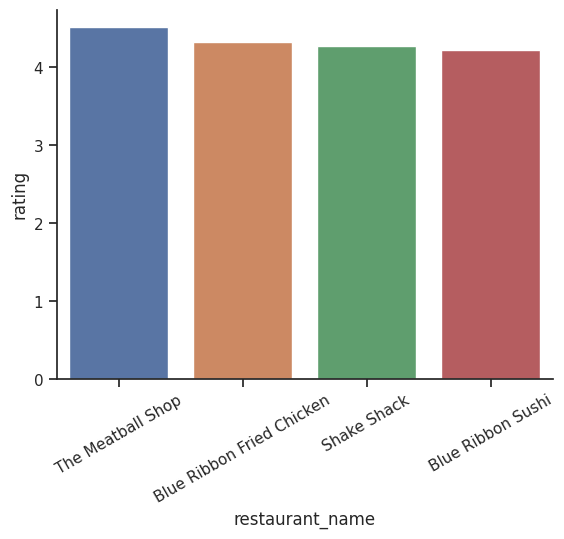

In [ ]:
sb.barplot(data = ds_above_4, x=ds_above_4.index, y=ds_above_4['rating'])
plt.xticks(rotation=30)
plt.show()

#### Observations:
- "Shake Shack" is the top rated restaurant however it has 3rd place in means of rating list.
- "The Meatball Shop" is the number 2 rated restaurant and it has number 1 mean rating.
- "Blue Ribbon Fried Chicken" is in the 3rd place

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Number of orders above $20
df.loc[df['cost_of_the_order'] > 20.0].shape[0]

555

In [ ]:
# Number of orders between $20 and $5
df.loc[(df['cost_of_the_order'] > 5.0) & (df['cost_of_the_order'] <= 20.0)].shape[0]

1334

In [ ]:
# Number of orders that are less than or equal to $5
df.loc[df['cost_of_the_order'] <= 5.0].shape[0]

9

In [ ]:
# Number of orders above $30
df.loc[df['cost_of_the_order'] > 30.0].shape[0]

100

In [ ]:
# Calculate 'revenue' based on the first condition (cost_of_the_order > 20.0)
df.loc[df['cost_of_the_order'] > 20.0, 'revenue'] = df.loc[df['cost_of_the_order'] > 20.0, 'cost_of_the_order'] * 0.25

# Calculate 'revenue' based on the second condition (5.0 < cost_of_the_order <= 20.0)
df.loc[(df['cost_of_the_order'] > 5.0) & (df['cost_of_the_order'] <= 20.0), 'revenue'] = df.loc[(df['cost_of_the_order'] > 5.0) & (df['cost_of_the_order'] <= 20.0), 'cost_of_the_order'] * 0.15
df['revenue'].sum()

6166.303

In [ ]:
# Calculate the total cost
df['cost_of_the_order'].sum()

31314.82

In [ ]:
# Percentage of the revenue in the total orders
df['revenue'].sum() / df['cost_of_the_order'].sum()

0.19691325065895318

#### Observations:

- Majority of the orders are between \$5 and $20.
- The company earned 6166.3 dollars so far from all orders.
- It's almost 20% of the cost of all orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Find the number of orders that has more than 60 minutes of total delivery time
nr_total_time_above = df[df['total_time'] > 60].shape[0]
print('Number of orders took more than 60 minutes to deliver:', nr_total_time_above)

# Find the percentage of them
print((nr_total_time_above/nr_rows)*100, '% of the orders took more than 60 minutes')

Number of orders took more than 60 minutes to deliver: 200
10.537407797681771 % of the orders took more than 60 minutes


#### Observations:
Number of orders took more than 60 minutes to deliver is 200. Which is the 10.5% of the total orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

#### Observations:
There is around 6 minutes difference between the delivery time of weekdays and weekends. It takes more time to deliver food in weekdays. There might be several reasons behind of it like the traffic jam due to working hours etc.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We have analyzed a dataset which has almost 2000 orders from different restaurants with different types of cuisine. The dataset also contains the customer ratings for some orders and cost of them along with the day of the week of the order takes place.

We have been able to conclude that:

1. The most preferred cuisine type is American.
2. The majority of the orders are not rated.
3. People are more tend to order during weekends.
4. The most preferred restaurant is "Shake Shack".
5. Total cost of the all orders is \$ 31K and the ravenue of the FoodHub is $ 6K.

### Recommendations:

- Providing some promotions during weekdays may increase the number of orders.
- To gather more insights about the restaurants some promotions can be provided for the people who rates the orders.
- Since there is no direct correlation between the rating and the total delivery time of the orders providing commitments such as less than 30 mint deliver etc. will not increase the customer sattisfaction.
- Almost 20% of the orders which are above \$20 are above $30. If FoodHub wants to increase the revenue, they can increase the charge for the orders above \$30.


### Further Analysis
- If we have the date of the order we may have insights regarding seasonality of the orders. Additionall, we can investigate if there is any relation between the number of orders and the day of the week (Sunday, Monday etc.)
- If we have the comments for the orders that are rated for 3 some sentiment analysis could be performed and the reason of the rating can be contained. If it's becasue of the delivery time, or the taste of the food or the cost etc.


---